In [1]:
from helper import generate_heisenberg_observable_data, generate_periodic_ising_observable_data, generate_2d_ising_observable_data, plot_bond_heatmaps

Define parameters

In [ ]:
J = 1
g = 0.5
dt = 0.1
num_qubits = 25
pad = 1

max_bonds = [256]
thresholds = [0]
timesteps_list = [*range(1, 11)]

In [3]:
results = generate_heisenberg_observable_data(num_qubits, J, g, dt, pad, thresholds, max_bonds, timesteps_list)

Max Bond 256
Threshold 0
Timesteps 1
Timesteps 2
Timesteps 3
Timesteps 4
Timesteps 5
Timesteps 6
Timesteps 7
Timesteps 8
Timesteps 9
Timesteps 10


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


def plot_bond_heatmaps(results,
                       bond_dim,
                       threshold,
                       method1='TEBD',
                       method2='TDVP',
                       cmap='plasma_r',
                       log_scale=False,
                       figsize=(12,5)):
    """
    Plot two heatmaps of bond dimensions over circuit layers:
      1) method1
      2) method2 with an inset showing total bond dimension over steps.

    Parameters
    ----------
    results : dict
        Dict with two keys (e.g. 'TEBD', 'TDVP'), each mapping to a list of
        tuples (depth, thr, bd, infid, err, bonds_list).
    bond_dim : int
        The maximum bond‐dim (bd) used in the run; filters results to only
        entries with this bd.
    threshold : float
        The threshold (thr) used in the run; filters results to only
        entries with this thr.
    method1, method2 : str
        Keys in `results` to compare.
    cmap : str
        Matplotlib colormap name for the heatmaps.
    log_scale : bool
        If True, apply log‐normalization to the heatmaps.
    figsize : tuple
        Figure size in inches (width, height).
    """
    def extract_matrix(method):
        filtered = [e for e in results[method] if e[1] == threshold and e[2] == bond_dim]
        filtered.sort(key=lambda x: x[0])
        return np.vstack([e[3] for e in filtered])

    mat1 = extract_matrix(method1)
    mat2 = extract_matrix(method2)
    assert mat1.shape == mat2.shape, "Shape mismatch between methods"

    # Determine shared color scaling
    vmin = min(mat1.min(), mat2.min())
    vmax = max(mat1.max(), mat2.max())
    norm = LogNorm(vmin=vmin, vmax=vmax) if log_scale else None

    # Create two panels
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)

    # Panel 1: method1
    im1 = axes[0].imshow(
        mat1, aspect='auto', origin='lower',
        interpolation='nearest', cmap=cmap, vmin=vmin, vmax=vmax,
        norm=norm
    )
    axes[0].set_title(method1)
    axes[0].set_xlabel("Bond index")
    axes[0].set_ylabel("Trotter Steps")

    # Panel 2: method2
    im2 = axes[1].imshow(
        mat2, aspect='auto', origin='lower',
        interpolation='nearest', cmap=cmap, vmin=vmin, vmax=vmax,
        norm=norm
    )
    axes[1].set_title(method2)
    axes[1].set_xlabel("Bond index")

    # Colorbar for panel 2 (next to it)
    cbar = fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)
    cbar.set_label("Bond dimension")

    # Inset: total bond dimension over Trotter steps
    total1 = np.sum(mat1**3, axis=1)
    total2 = np.sum(mat2**3, axis=1)
    axins = inset_axes(axes[1], width="30%", height="30%", loc='lower right', borderpad=4)
    print(total1/total2)
    axins.plot(np.arange(len(total1)), total1 / total2)
    # axins.plot(np.arange(len(total2)), total2, label=method2)
    axins.set_ylabel("Runtime Ratio")
    axins.set_xlabel("Step")
    # axins.set_ylim(0.8, 4)
    # axins.legend(fontsize='small', loc='upper left')

    plt.tight_layout()
    plt.show()


[1.         1.         1.         1.04531522 1.03952521 1.06886525
 1.05839636 1.05071449 1.02360522 1.05932585]


C:\Users\aaron\AppData\Local\Temp\ipykernel_43956\2193988830.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


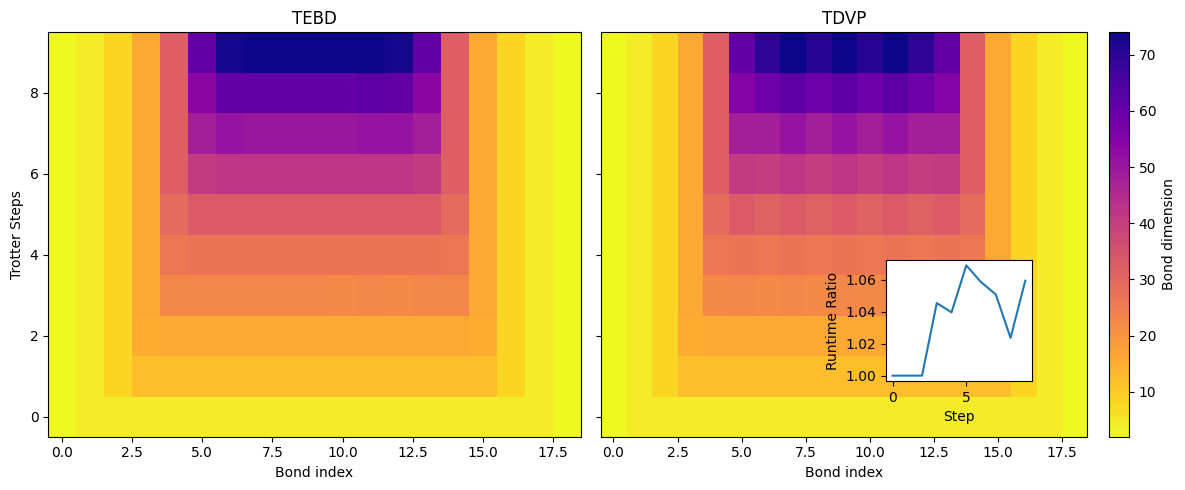

In [5]:
plot_bond_heatmaps(results, bond_dim=max_bonds[0], threshold=0)

In [6]:
# results = generate_periodic_ising_observable_data(num_qubits, J, g, dt, pad, thresholds, max_bonds, timesteps_list)

In [7]:
# plot_bond_heatmaps(results, bond_dim=max_bonds[0], threshold=0)

In [ ]:
J = 1
g = 0.5
dt = 0.1
num_rows = 5
num_cols = 5
pad = 1
timesteps_list = [*range(1, 11)]
results = generate_2d_ising_observable_data(num_rows, num_cols, J, g, dt, pad, thresholds, max_bonds, timesteps_list)

Max Bond 256
Timesteps 1
Timesteps 2
Timesteps 3
Timesteps 4
Timesteps 5
Timesteps 6
Timesteps 7
Timesteps 8
Timesteps 9
Timesteps 10


[9.11024182 5.28997778 1.81113706 1.497168   2.08482498 2.05984789
 1.38459583 1.39814862 1.39908713 1.30242123]


C:\Users\aaron\AppData\Local\Temp\ipykernel_43956\2193988830.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


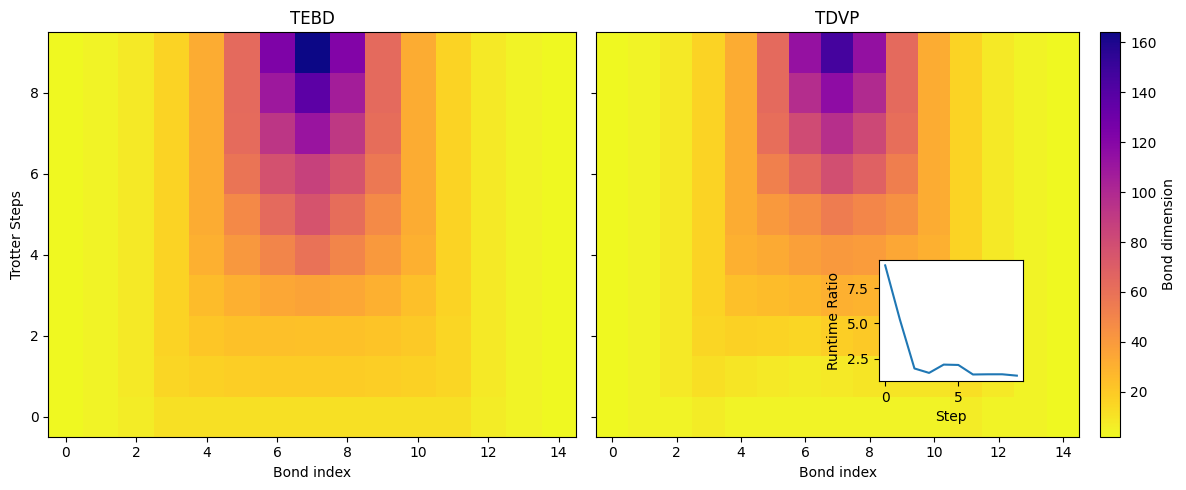

In [9]:
plot_bond_heatmaps(results, bond_dim=max_bonds[0], threshold=0)